In [13]:
import os
print("Current directory:", os.getcwd())

import numpy as np
pwd_ = "./Data/"

angle_ori = np.load(pwd_ + "ori-s999/lankle/angle.npy", allow_pickle=True)
print("ori-s999/lankle/angle.npy:", angle_ori.shape)

angle_left = np.load(pwd_ + "ex-SUB03/LeftAnkleAngle/angle.npy", allow_pickle=True)
print("LeftAnkleAngle/angle.npy:", angle_left.shape)


Current directory: /home/owen/projects/25spring/wearable/Data
ori-s999/lankle/angle.npy: (4600, 3)
LeftAnkleAngle/angle.npy: (452, 3)


In [ ]:

angle_ori

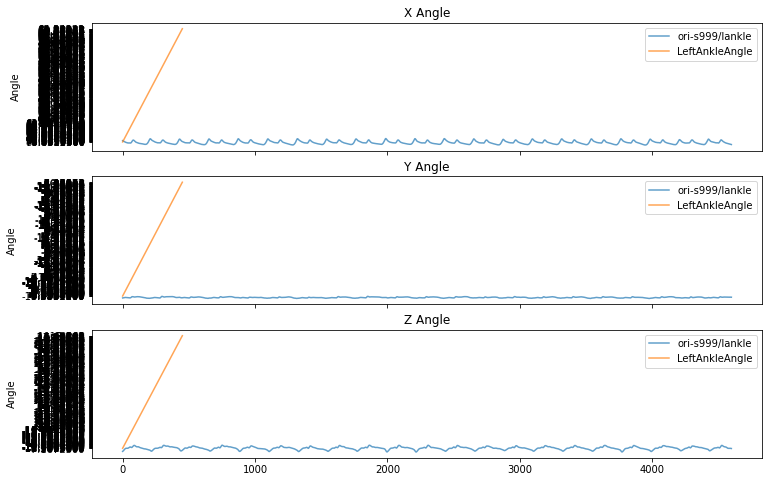

In [16]:
import numpy as np
import matplotlib.pyplot as plt

t_ori = np.arange(angle_ori.shape[0])
t_left = np.arange(angle_left.shape[0])

fig, axs = plt.subplots(3, 1, figsize=(12, 8), sharex=True)
titles = ['X Angle', 'Y Angle', 'Z Angle']

for i in range(3):
    axs[i].plot(t_ori, angle_ori[:, i], label='ori-s999/lankle', alpha=0.7)
    axs[i].plot(t_left, angle_left[:, i], label='LeftAnkleAngle', alpha=0.7)
    axs[i].set_ylabel('Angle')
    axs[i].set_title(titles[i])
    axs[i].legend()

plt.show()


In [19]:
import os
print("Current directory:", os.getcwd())

import numpy as np
pwd_ = "./Data/"


angle_ori = np.load(pwd_ + "ori-s999/lfoot/acc.npy", allow_pickle=True)
print("ori-s999/lankle/angle.npy:", angle_ori.shape)

angle_left = np.load(pwd_ + "ex-SUB03/LeftFoot/acc.npy", allow_pickle=True)
print("LeftAnkleAngle/angle.npy:", angle_left.shape)


Current directory: /home/owen/projects/25spring/wearable/Data
ori-s999/lankle/angle.npy: (4600, 3)
LeftAnkleAngle/angle.npy: (452, 3)


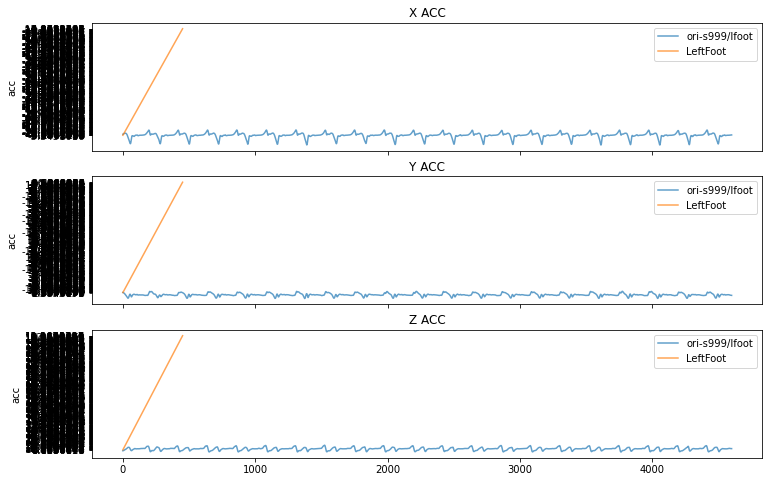

In [24]:
import numpy as np
import matplotlib.pyplot as plt

t_ori = np.arange(angle_ori.shape[0])
t_left = np.arange(angle_left.shape[0])

fig, axs = plt.subplots(3, 1, figsize=(12, 8), sharex=True)
titles = ['X ACC', 'Y ACC', 'Z ACC']

for i in range(3):
    axs[i].plot(t_ori, angle_ori[:, i], label='ori-s999/lfoot', alpha=0.7)
    axs[i].plot(t_left, angle_left[:, i], label='LeftFoot', alpha=0.7)
    axs[i].set_ylabel('acc')
    axs[i].set_title(titles[i])
    axs[i].legend()

plt.show()


In [40]:
import pandas as pd
# dir_ = "./Data/Walk_01_rep1.csv"
df = pd.read_csv(dir_, header = None)

In [38]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,131,132,133,134,135,136,137,138,139,140
0,NaN,Chest,Chest,Chest,Chest,Chest,Chest,Chest,Chest,Chest,...,RightWrist,RightWrist,RightWrist,RightWrist,RightWrist,RightWrist,RightWrist,RightWrist,RightWrist,RightWrist
1,NaN,Time,Orientation,Orientation,Orientation,Orientation,Accelerometer,Accelerometer,Accelerometer,Gyroscope,...,Orientation,Accelerometer,Accelerometer,Accelerometer,Gyroscope,Gyroscope,Gyroscope,Magnetometer,Magnetometer,Magnetometer
2,NaN,S,S,X,Y,Z,X,Y,Z,X,...,Z,X,Y,Z,X,Y,Z,X,Y,Z
3,0.0,5.1600000,0.2940123,-0.5505049,0.2316719,0.7462099,-11.2267930,-0.5241701,5.1806642,0.3085638,...,0.2747177,-11.4139223,1.6479506,2.6383909,0.1226345,-0.1073258,-0.0247742,44.8068637,-4.2449438,-1.9043549
4,1.0,5.1700000,0.2948965,-0.5499804,0.2327705,0.7459058,-11.5417027,-0.2842775,5.3600326,0.3046840,...,0.2744569,-11.4334658,1.5039169,2.5171313,0.1836752,-0.1509067,0.0082730,44.7034514,-4.2391968,-1.9564711


In [42]:
import pandas as pd
import numpy as np

df_T = df.T

df_T.columns = ['row0', 'row1', 'row2'] + list(df_T.columns[3:])

# row0 == 'LeftFoot', row1 == 'Accelerometer', row2 in ['X', 'Y', 'Z']
mask = (df_T['row0'] == 'LeftFoot') & \
       (df_T['row1'] == 'Accelerometer') & \
       (df_T['row2'].isin(['X', 'Y', 'Z']))

selected_cols = df_T[mask].index

data = pd.read_csv(dir_, skiprows=3)

filtered_data = data.iloc[:, selected_cols].to_numpy()

np.save("left_foot_accel_xyz.npy", filtered_data)

print("Saved shape:", filtered_data.shape)


Saved shape: (76, 3)


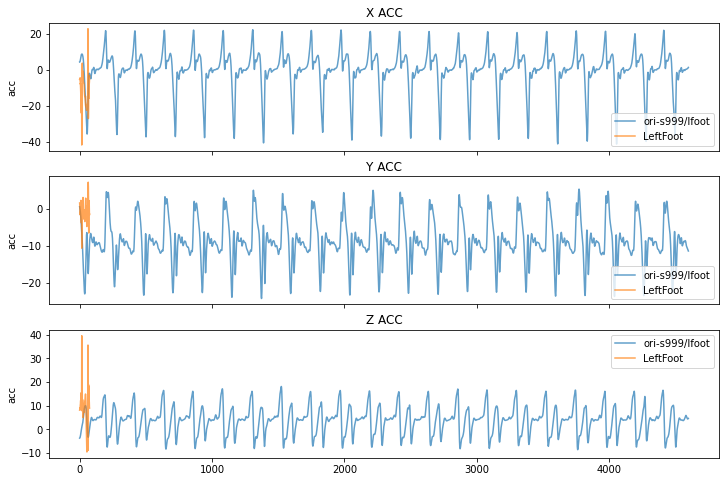

In [46]:
import numpy as np
import matplotlib.pyplot as plt

t_ori = np.arange(angle_ori.shape[0])
t_left = np.arange(filtered_data.shape[0])

fig, axs = plt.subplots(3, 1, figsize=(12, 8), sharex=True)
titles = ['X ACC', 'Y ACC', 'Z ACC']

for i in range(3):
    axs[i].plot(t_ori, angle_ori[:, i], label='ori-s999/lfoot', alpha=0.7)
    axs[i].plot(t_left, filtered_data[:, i], label='LeftFoot', alpha=0.7)
    axs[i].set_ylabel('acc')
    axs[i].set_title(titles[i])
    axs[i].legend()

plt.show()
